## Importamos las librerías necesarias

In [ ]:
import pandas as pd # gestionar dataframes -> tablas 
import numpy as np # gestionar arreglos, que son matrices mutlidimensionales
import sklearn as skl # Funciones muy comunes en ciencia de datos
import matplotlib.pyplot as plt # Grafica

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Preparamos la base de datos

### Importamos los datos desde Drive, y los convertimos en df

In [ ]:
path1 = "/content/drive/My Drive/registro_de_alimentos.csv"
path2 = "/content/drive/My Drive/Food Nutrient Database.csv"

In [ ]:
df1 = pd.read_csv(path1, index_col=0)
df2 = pd.read_csv(path2, index_col=0)

In [ ]:
print(df1.shape)
df1.head()

(478, 9)


,Fecha,Hora,Nombre,Calorias (cal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg),Fuente
ID,,,,,,,,,
1,"lunes, 16 de agosto de 2021",06:50,2 huevo frito,156,0.74,11.76,10.84,414.0,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
2,"lunes, 16 de agosto de 2021",06:50,Plátano,105,27.00,0.40,1.30,0.0,MyFitnessPal
3,"lunes, 16 de agosto de 2021",08:30,Jugo verde,80,13.60,2.00,1.90,25.5,MyFitnessPal
4,"lunes, 16 de agosto de 2021",09:30,Ham salad sandwich,300,41.90,6.70,16.10,0.0,MyFitnessPal
5,"lunes, 16 de agosto de 2021",15:30,Brocheta 200g,342,2.00,18.60,41.60,0.0,MyFitnessPal


In [ ]:
print(df2.shape)
df2.head()

(5740, 56)


,Survey ID,Food Name,Survey flag,"Energy, with dietary fibre (kJ)","Energy, without dietary fibre (kJ)",Moisture (g),Protein (g),Total fat (g),"Available carbohydrates, with sugar alcohols (g)","Available carbohydrates, without sugar alcohol (g)",Starch (g),Total sugars (g),Added sugars (g),Free sugars (g),Dietary fibre (g),Alcohol (g),Ash (g),Preformed vitamin A (retinol) (µg),Beta-carotene (µg),Provitamin A (b-carotene equivalents) (µg),Vitamin A retinol equivalents (µg),Thiamin (B1) (mg),Riboflavin (B2) (mg),Niacin (B3) (mg),Niacin derived equivalents (mg),"Folate, natural (µg)",Folic acid (µg),Total Folates (µg),Dietary folate equivalents (µg),Vitamin B6 (mg),Vitamin B12 (µg),Vitamin C (mg),Alpha-tocopherol (mg),Vitamin E (mg),Calcium (Ca) (mg),Iodine (I) (µg),Iron (Fe) (mg),Magnesium (Mg) (mg),Phosphorus (P) (mg),Potassium (K) (mg),Selenium (Se) (µg),Sodium (Na) (mg),Zinc (Zn) (mg),Caffeine (mg),Cholesterol (mg),Tryptophan (mg),Total saturated fat (g),Total monounsaturated fat (g),Total polyunsaturated fat (g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Total trans fatty acids (mg)
Food ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10F40019,31103001,"Beef, extract, bonox",NaN,401,401,56.6,16.6,0.2,6.5,6.5,6.5,0.0,0.0,0.0,0.0,0.0,19.8,0,0,0,0,0.360,0.270,5.40,7.71,6,0,6,6,0.23,8.0,0,0.6,0.60,110,9.1,2.00,60,360,690,4.0,6660,1.50,0,0,136,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
13A12001,31302001,"Basil, dried",NaN,1079,774,10.0,18.2,5.5,15.5,15.5,15.5,0.0,0.0,0.0,38.2,0.0,15.5,0,27135,27334,4556,0.327,1.900,7.79,11.62,436,0,436,436,1.34,0.0,337,6.9,6.91,2091,57.0,16.36,273,291,3818,2.7,118,17.27,0,0,225,2.36,1.40,0.61,0.26,0.34,0.0,0.0,0.0,0.0,0.0
10E10113,31302002,"Cardamom, seeds, ground",NaN,1333,1109,8.3,10.8,6.7,40.5,40.5,31.0,9.5,0.0,0.0,28.0,0.0,5.8,0,0,0,0,0.198,0.182,1.10,3.74,0,0,0,0,0.23,0.0,21,0.5,0.50,383,0.5,13.97,229,178,1119,0.5,18,7.47,0,0,155,2.20,2.81,1.39,1.00,0.39,0.0,0.0,0.0,0.0,0.0
10E10098,31302003,Chilli (chili) powder,NaN,1441,1167,7.8,12.3,16.8,20.5,20.5,10.4,10.1,0.0,0.0,34.2,0.0,11.8,0,15000,17790,2965,0.350,0.790,7.90,8.98,9,0,9,9,2.09,0.0,0,38.1,38.14,278,0.5,14.30,170,303,1920,20.4,1010,2.70,0,0,64,2.41,3.15,7.85,7.32,0.52,0.0,0.0,0.0,0.0,0.0
10E10107,31302004,"Chilli (chili), dried, ground",NaN,1573,1355,6.6,14.1,16.8,29.6,29.6,19.2,10.4,0.0,0.0,27.2,0.0,10.0,0,15000,15000,2500,0.350,0.790,7.90,9.15,9,0,9,9,2.09,0.0,0,38.1,38.14,278,0.5,14.30,170,303,1920,20.4,20,2.70,0,0,73,2.42,3.16,7.89,7.36,0.52,0.0,0.0,0.0,0.0,0.0


### Modificamos la segunda base de datos para poder concatenarla con la primera

In [ ]:
df2.columns

Index(['Survey ID', 'Food Name', 'Survey flag',
       'Energy, with dietary fibre (kJ)', 'Energy, without dietary fibre (kJ)',
       'Moisture (g)', 'Protein (g)', 'Total fat (g)',
       'Available carbohydrates, with sugar alcohols (g)',
       'Available carbohydrates, without sugar alcohol (g)', 'Starch (g)',
       'Total sugars (g)', 'Added sugars (g)', 'Free sugars (g)',
       'Dietary fibre (g)', 'Alcohol (g)', 'Ash (g)',
       'Preformed vitamin A (retinol) (µg)', 'Beta-carotene (µg)',
       'Provitamin A (b-carotene equivalents) (µg)',
       'Vitamin A retinol equivalents (µg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Niacin derived equivalents (mg)', 'Folate, natural  (µg)',
       'Folic acid  (µg)', 'Total Folates  (µg)',
       'Dietary folate equivalents  (µg)', 'Vitamin B6 (mg)',
       'Vitamin B12  (µg)', 'Vitamin C (mg)', 'Alpha-tocopherol (mg)',
       'Vitamin E (mg)', 'Calcium (Ca) (mg)', 'Iodine (I) (µg)',
       'Iro

In [ ]:
list_to_drop = ['Survey ID', 'Food Name', 'Survey flag',
       'Energy, with dietary fibre (kJ)', 
       'Moisture (g)', 
       'Available carbohydrates, without sugar alcohol (g)', 'Starch (g)',
       'Total sugars (g)', 'Added sugars (g)', 'Free sugars (g)',
       'Dietary fibre (g)', 'Alcohol (g)', 'Ash (g)',
       'Preformed vitamin A (retinol) (µg)', 'Beta-carotene (µg)',
       'Provitamin A (b-carotene equivalents) (µg)',
       'Vitamin A retinol equivalents (µg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Niacin derived equivalents (mg)', 'Folate, natural  (µg)',
       'Folic acid  (µg)', 'Total Folates  (µg)',
       'Dietary folate equivalents  (µg)', 'Vitamin B6 (mg)',
       'Vitamin B12  (µg)', 'Vitamin C (mg)', 'Alpha-tocopherol (mg)',
       'Vitamin E (mg)', 'Calcium (Ca) (mg)', 'Iodine (I) (µg)',
       'Iron (Fe) (mg)', 'Magnesium (Mg) (mg)', 'Phosphorus (P) (mg)',
       'Potassium (K) (mg)', 'Selenium (Se) (µg)',
       'Zinc (Zn) (mg)', 'Caffeine (mg)', 'Cholesterol (mg)',
       'Tryptophan (mg)', 'Total saturated fat (g)',
       'Total monounsaturated fat (g)', 'Total polyunsaturated fat (g)',
       'Linoleic acid (g)', 'Alpha-linolenic acid (g)',
       'C20:5w3 Eicosapentaenoic (mg)', 'C22:5w3 Docosapentaenoic (mg)',
       'C22:6w3 Docosahexaenoic (mg)',
       'Total long chain omega 3 fatty acids (mg)',
       'Total trans fatty acids (mg)']
df2_Vars = df2.drop(list_to_drop, axis=1)
df2_Vars.head()

,"Energy, without dietary fibre (kJ)",Protein (g),Total fat (g),"Available carbohydrates, with sugar alcohols (g)",Sodium (Na) (mg)
Food ID,,,,,
10F40019,401,16.6,0.2,6.5,6660
13A12001,774,18.2,5.5,15.5,118
10E10113,1109,10.8,6.7,40.5,18
10E10098,1167,12.3,16.8,20.5,1010
10E10107,1355,14.1,16.8,29.6,20


In [ ]:
# Verificar si hay NaN values
df2_Vars.isnull().values.any()

False

No hay valores en blanco dentro del df de los atributos que nos importan

#### La segunda base de datos tiene las calorías en otra unidad

Hacemos la conversión de unidades en esa base de datos

In [ ]:
ids_df2 = df2_Vars.loc[:, "Energy, without dietary fibre (kJ)"].index.tolist()

In [ ]:
for i in ids_df2:
  val = df2_Vars.loc[i, "Energy, without dietary fibre (kJ)"]
  df2_Vars.at[i, "Energy, without dietary fibre (kJ)"] = val/4.184

In [ ]:
df2_Vars

,"Energy, without dietary fibre (kJ)",Protein (g),Total fat (g),"Available carbohydrates, with sugar alcohols (g)",Sodium (Na) (mg)
Food ID,,,,,
10F40019,95,16.6,0.2,6.5,6660
13A12001,184,18.2,5.5,15.5,118
10E10113,265,10.8,6.7,40.5,18
10E10098,278,12.3,16.8,20.5,1010
10E10107,323,14.1,16.8,29.6,20
...,...,...,...,...,...
13A11950,81,1.2,7.6,2.3,1
13A11949,81,1.2,7.6,2.3,1
13A12055,80,1.2,7.4,2.3,5


Renombramos los atributos para hacer la concatenación

In [ ]:
d = {'Energy, without dietary fibre (kJ)': 'Calorias (cal)',
     'Protein (g)': 'Proteína (g)', 
     'Total fat (g)': 'Lípidos (g)', 
     'Available carbohydrates, with sugar alcohols (g)': 'Carbohidratos (g)', 
     'Sodium (Na) (mg)': 'Sodio (mg)'}
df2_Vars.rename(columns = d, inplace = True)
df2_Vars.head()

,Calorias (cal),Proteína (g),Lípidos (g),Carbohidratos (g),Sodio (mg)
Food ID,,,,,
10F40019,95,16.6,0.2,6.5,6660
13A12001,184,18.2,5.5,15.5,118
10E10113,265,10.8,6.7,40.5,18
10E10098,278,12.3,16.8,20.5,1010
10E10107,323,14.1,16.8,29.6,20


### Concatenamos las dos bases de datos

Solo tomando en cuenta las variables que nos importan

In [ ]:
df1.columns

Index(['Fecha', 'Hora', 'Nombre', 'Calorias (cal)', 'Carbohidratos (g)',
       'Lípidos (g)', 'Proteína (g)', 'Sodio (mg)', 'Fuente'],
      dtype='object')

In [ ]:
list_to_drop = ['Fecha', 'Hora', 'Nombre', 'Fuente']
df1_Vars = df1.drop(list_to_drop, axis=1)
df1_Vars.head()

,Calorias (cal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
ID,,,,,
1,156,0.74,11.76,10.84,414.0
2,105,27.00,0.40,1.30,0.0
3,80,13.60,2.00,1.90,25.5
4,300,41.90,6.70,16.10,0.0
5,342,2.00,18.60,41.60,0.0


In [ ]:
df3 = pd.concat([df1_Vars, df2_Vars])
df3

,Calorias (cal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
1,156,0.74,11.76,10.84,414.0
2,105,27.00,0.40,1.30,0.0
3,80,13.60,2.00,1.90,25.5
4,300,41.90,6.70,16.10,0.0
5,342,2.00,18.60,41.60,0.0
...,...,...,...,...,...
13A11950,81,2.30,7.60,1.20,1.0
13A11949,81,2.30,7.60,1.20,1.0
13A12055,80,2.30,7.40,1.20,5.0
13A11848,15,2.00,0.40,1.10,1.0


Si la suma del número de renglones de ambos df es igual al número de renglones del df3, la concatenación se hizo correctamente.

In [ ]:
if df1_Vars.shape[0] + df2_Vars.shape[0] == df3.shape[0]:
  print('---')

---


### Obtenemos las variables predictoras

In [ ]:
# Predicting attributes df
X = df3.drop(['Calorias (cal)'], axis=1)
X.head()

,Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
1,0.74,11.76,10.84,414.0
2,27.00,0.40,1.30,0.0
3,13.60,2.00,1.90,25.5
4,41.90,6.70,16.10,0.0
5,2.00,18.60,41.60,0.0


In [ ]:
# Dependent variable
y = df3['Calorias (cal)']
y.head()

1    156
2    105
3     80
4    300
5    342
Name: Calorias (cal), dtype: int64

Hasta el momento, **X** es un df con nuestras variables predictoras/independientes, mientras que **y** es un pd series de nuestra variable de respuesta. 

## Creamos el Modelo de Regresión lineal

En los modelos ML supervisados, como regresión lineal, se deben separar los datos en un conjunto de entrenamiento y otro de prueba.

In [ ]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data                                                   
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, # 20-30 % 
                                                    random_state = 42) # cualquier n
# x_train, x_test, y_train, y_test

In [ ]:
x_train.head()

,Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
05A10648,0.0,1.0,21.1,97.0
09D10246,24.2,3.0,3.6,54.0
13A11950,2.3,7.6,1.2,1.0
13A12084,2.1,1.5,2.4,36.0
02D10267,81.2,1.1,6.8,658.0


Creamos el modelo de regresión lineal (podríamos usar cualquier otro modelo de regresión de sklearn) (El regresor que tiene mejor desempeño en este momento es XGBoost regression)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_prediction_lr = LR.predict(x_test)
y_prediction_lr

array([177.77423326, 245.52189279, 323.35809808, ..., 430.93343467,
       115.34234878, 349.99741754])

### Métricas para evaluar el desempeño del modelo

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_lr = r2_score(y_test, y_prediction_lr)


print('r2 score de la rl es', score_lr)

print('mean_srqd error de la rl is--', mean_squared_error(y_test, y_prediction_lr))

print('root_mean_squared error de la rl--', np.sqrt(mean_squared_error(y_test, y_prediction_lr)))

r2 score de la rl es 0.9910221038977085
mean_srqd error de la rl is-- 201.07482642870087
root_mean_squared error de la rl-- 14.180085557876613


Ahora:
1. Averiguar los coeficientes del modelo (Google)
2. Graficar de a pares las variables independientes contra la variable dependiente. (Matoplotlib)
3. Determinar con un F-test si el modelo es sifnigicativo (Google)

### Coeficientes

In [ ]:
c_carbs, c_lips, c_prots, c_sod = LR.coef_
print(f"""
Los coeficientes del modelo son:
Carbohidratos: {c_carbs:.4f}
Lípidos: {c_lips:.4f}
Proteínas: {c_prots:.4f}
Sodio: {c_sod:.4f}""")


Los coeficientes del modelo son:
Carbohidratos: 3.9027
Lípidos: 8.7869
Proteínas: 3.9670
Sodio: 0.0000


### Gráficas

Son 4 gráficas en tres dimensiones

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


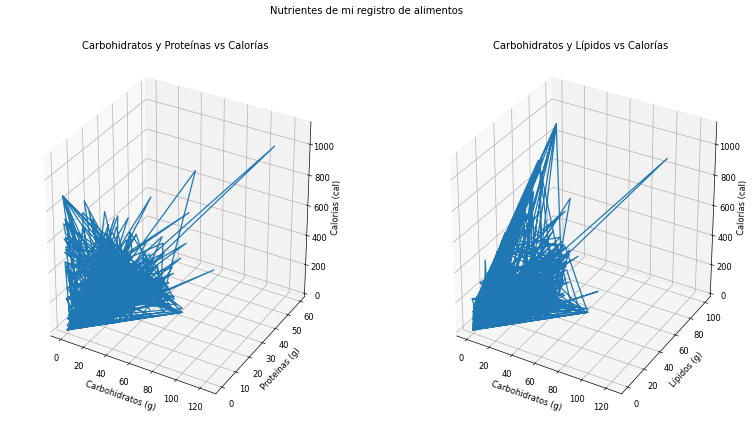

In [ ]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

# Array del eje z -> las calorías
y_np_arr = np.array([y_test])

# Creamos la figura
fig1 = plt.figure(figsize=(16, 8), dpi=60)
plt.suptitle("Nutrientes de mi registro de alimentos")


# Gráfico para Carbs, Prots y Cals
                            # plano 3d
ax1 = fig1.add_subplot(121, projection='3d')
ax1.plot_wireframe(x_test["Carbohidratos (g)"], x_test["Proteína (g)"], y_np_arr)
ax1.title.set_text("Carbohidratos y Proteínas vs Calorías")
ax1.set_xlabel("Carbohidratos (g)")
ax1.set_ylabel("Proteínas (g)")
ax1.set_zlabel("Calorías (cal)")

# Gráfico para Carbs, Líps y Cals
                            # plano 3d
ax2 = fig1.add_subplot(122, projection='3d')
ax2.plot_wireframe(x_test["Carbohidratos (g)"], x_test["Lípidos (g)"], y_np_arr)
ax2.title.set_text("Carbohidratos y Lípidos vs Calorías")
ax2.set_xlabel("Carbohidratos (g)")
ax2.set_ylabel("Lípidos (g)")
ax2.set_zlabel("Calorías (cal)")

fig1.show()

Las primeras dos gráficas son de Carbohidratos y Proteínas vs Calorías, y Carbohidratos y Lípidos vs Calorías.

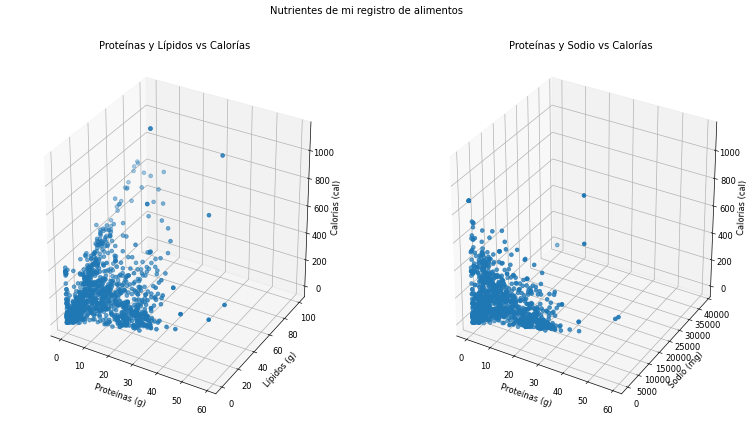

In [ ]:
fig2 = plt.figure(figsize=(16, 8), dpi=60)
plt.suptitle("Nutrientes de mi registro de alimentos")

# Gráfico para Prots, Líps y Cals
                            # plano 3d
ax3 = fig2.add_subplot(121, projection='3d')
ax3.scatter(x_test["Proteína (g)"], x_test["Lípidos (g)"], y_test)
ax3.title.set_text("Proteínas y Lípidos vs Calorías")
ax3.set_xlabel("Proteínas (g)")
ax3.set_ylabel("Lípidos (g)")
ax3.set_zlabel("Calorías (cal)")

# Gráfico para Prots, Sodio y Cals
                            # plano 3d
ax4 = fig2.add_subplot(122, projection='3d')
ax4.scatter(x_test["Proteína (g)"], x_test["Sodio (mg)"], y_test)
ax4.title.set_text("Proteínas y Sodio vs Calorías")
ax4.set_xlabel("Proteínas (g)")
ax4.set_ylabel("Sodio (mg)")
ax4.set_zlabel("Calorías (cal)")

fig2.show()

Estas otras dos gráficas son de Proteínas y Lípidos vs Calorías, y Proteínas y Sodio vs Calorías.

### Determinar si el modelo es significativo

Encontrar F para evaluar qué tan significativo es el modelo en general

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:         Calorias (cal)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.469e+05
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:02:22   Log-Likelihood:                -25922.
No. Observations:                6218   AIC:                         5.185e+04
Df Residuals:                    6213   BIC:                         5.189e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7500      0.38

La F-test muestra que el modelo es significativo porque el valor crítico de f es muy pequeño. Lo mismo pudimos apreciar cuando el modelo se creó usando las herramientas de Excel

Recordemos que los p-valores de cada variable nos dicen si las variables son significativas para el modelo o no. En este caso, es otra prueba que nos afirma que el modelo creado puede predecir, con un error bajo, las calorías de un alimento. Sin embargo, el p-valor del sodio así como su coeficiente nos indican que no es una variable significativa para el modelo de RL. Con esto en mente, se hará una segunda iteración sin contar al sodio como variable predictora.

In [ ]:
new_X = X.drop(["Sodio (mg)"], axis=1)
new_X

,Carbohidratos (g),Lípidos (g),Proteína (g)
1,0.74,11.76,10.84
2,27.00,0.40,1.30
3,13.60,2.00,1.90
4,41.90,6.70,16.10
5,2.00,18.60,41.60
...,...,...,...
13A11950,2.30,7.60,1.20
13A11949,2.30,7.60,1.20
13A12055,2.30,7.40,1.20
13A11848,2.00,0.40,1.10


In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_X, y, 
                                                        test_size = 0.2, 
                                                        random_state = 42)
LR2 = LinearRegression()
LR2.fit(x_train2, y_train2)
y_prediction_lr2 = LR2.predict(x_test2)

X2 = sm.add_constant(new_X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Calorias (cal)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.958e+05
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:02:22   Log-Likelihood:                -25922.
No. Observations:                6218   AIC:                         5.185e+04
Df Residuals:                    6214   BIC:                         5.188e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.7563      0.38

In [ ]:
c_carbs2, c_lips2, c_prots2 = LR2.coef_
print(f"""
Los coeficientes del modelo son:
Carbohidratos: {c_carbs2:.4f}
Lípidos: {c_lips2:.4f}
Proteínas: {c_prots2:.4f}""")


Los coeficientes del modelo son:
Carbohidratos: 3.9028
Lípidos: 8.7869
Proteínas: 3.9670


Notamos que los coeficientes de las 3 variables predictoras no cambiaron. El valor de F sí cambió, y sigue confirmando que el modelo es significativo. También, la segunda *Warning* que advertía sobre una posible multicolinealidad desapareció. Con esto concluimos el modelo de RL para predecir el número de calorías de un alimento según su cantidad de carbohidratos, lípidos y proteínas en gramos.

### 4 Métricas

Además de `r2_score` y `mean_squeared_error`, otras métricas que usaré para evaluar el desempeño de los modelos son `max_error` y `median_absolut_error`

In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

score_lr2 = r2_score(y_test2, y_prediction_lr2)
m_sqrd_e_lr2 = mean_squared_error(y_test2, y_prediction_lr2)
m_error_lr2 = max_error(y_test2, y_prediction_lr2)
m_abs_e_lr2 = median_absolute_error(y_test2, y_prediction_lr2)

print(f"""
El r2 score de la RL es: {score_lr2}
El mean squared error de la RL es: {m_sqrd_e_lr2}
y el root mean squared error es: {np.sqrt(m_sqrd_e_lr2)}
Error máximo de la RL: {m_error_lr2}
El median absolut error de la RL es: {m_abs_e_lr2}
""")


El r2 score de la RL es: 0.9910223812890226
El mean squared error de la RL es: 201.06861379160569
y el root mean squared error es: 14.179866494138993
Error máximo de la RL: 210.25170504883678
El median absolut error de la RL es: 2.2921638719206996



## XGBoost regresión

In [ ]:
# Librería necesaria
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Utilizamos los mismos daots que la última iteración de regresión lineal
xgbr = GradientBoostingRegressor(n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=1, 
                                 random_state=0, 
                                 loss='squared_error').fit(x_train2, y_train2)

In [ ]:
y_prediction_xgb = xgbr.predict(x_test2)
y_prediction_xgb

array([179.36303103, 210.407755  , 332.96986303, ..., 405.53093395,
       115.1064992 , 333.67338974])

### Métricas XGBR

In [ ]:
score_xgb = r2_score(y_test2, y_prediction_xgb)
m_sqrd_e_xgb = mean_squared_error(y_test2, y_prediction_xgb)
m_error_xgb = max_error(y_test2, y_prediction_xgb)
m_abs_e_xgb = median_absolute_error(y_test2, y_prediction_xgb)

print(f"""
El r2 score de la XGBoost R es: {score_xgb}
El mean squared error de la XGBoost R es: {m_sqrd_e_xgb}
y el root mean squared de la XGBoost R es: {np.sqrt(m_sqrd_e_xgb)}
Error máximo de la XGBoost R es: {m_error_xgb}
El median absolut error de la XGBoost R es: {m_abs_e_xgb}
""")


El r2 score de la XGBoost R es: 0.9604697953390003
El mean squared error de la XGBoost R es: 885.3442889445714
y el root mean squared de la XGBoost R es: 29.75473557174675
Error máximo de la XGBoost R es: 269.26649337023946
El median absolut error de la XGBoost R es: 15.538173922544928



## Linear Model Lasso

In [ ]:
# Librería necesaria
from sklearn.linear_model import Lasso

In [ ]:
# Utilizamos los mismos daots que la última iteración de regresión lineal
lsso = Lasso(alpha=0.1)
lsso.fit(x_train2, y_train2)
y_prediction_ls = lsso.predict(x_test2)
y_prediction_ls

array([177.78945187, 245.5103052 , 323.31931302, ..., 430.92633327,
       115.35537676, 349.99878311])

Este modelo tiene coeficientes como el de RL

In [ ]:
c_carbs_lsso, c_lips_lsso, c_prots_lsso = lsso.coef_
print(f"""
Los coeficientes del modelo son:
Carbohidratos: {c_carbs_lsso:.4f}
Lípidos: {c_lips_lsso:.4f}
Proteínas: {c_prots_lsso:.4f}""")


Los coeficientes del modelo son:
Carbohidratos: 3.9025
Lípidos: 8.7865
Proteínas: 3.9660


### Métricas Lasso

In [ ]:
score_lsso = r2_score(y_test2, y_prediction_ls)
m_sqrd_e_lsso = mean_squared_error(y_test2, y_prediction_ls)
m_error_lsso = max_error(y_test2, y_prediction_ls)
m_abs_e_lsso = median_absolute_error(y_test2, y_prediction_ls)

print(f"""
El r2 score del modelo Lasso es: {score_lsso}
El mean squared error del modelo Lasso es: {m_sqrd_e_lsso}
y el root mean squared del modelo Lasso es: {np.sqrt(m_sqrd_e_lsso)}
Error máximo del modelo Lasso es: {m_error_lsso}
El median absolut error del modelo Lasso es: {m_abs_e_lsso}
""")


El r2 score del modelo Lasso es: 0.991022439116758
El mean squared error del modelo Lasso es: 201.06731864386612
y el root mean squared del modelo Lasso es: 14.179820825520544
Error máximo del modelo Lasso es: 210.23007440876296
El median absolut error del modelo Lasso es: 2.2989922433004892



## Modelo de regresión de una Neural Network

In [ ]:
# Librerías necesarias
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
# Utilizamos los mismos datos que la última iteración de regresión lineal
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train2, y_train2)
y_prediction_nn = regr.predict(x_test2)
y_prediction_nn

array([176.86535435, 244.34344728, 324.03030814, ..., 430.18374404,
       114.1510882 , 351.37992478])

### Métricas Neural Network

In [ ]:
score_nn = r2_score(y_test2, y_prediction_nn)
m_sqrd_e_nn = mean_squared_error(y_test2, y_prediction_nn)
m_error_nn = max_error(y_test2, y_prediction_nn)
m_abs_e_nn = median_absolute_error(y_test2, y_prediction_nn)

In [ ]:
print(f"""
El r2 score de la regresión con Neural Network es: {score_nn}
El mean squared error de la regresión con Neural Network es: {m_sqrd_e_nn}
y el root mean squared de la regresión con Neural Network es: {np.sqrt(m_sqrd_e_nn)}
Error máximo de la regresión con Neural Network es: {m_error_nn}
El median absolut error de la regresión con Neural Network es: {m_abs_e_nn}
""")


El r2 score de la regresión con Neural Network es: 0.9917535135943971
El mean squared error de la regresión con Neural Network es: 184.6936970266352
y el root mean squared de la regresión con Neural Network es: 13.590205922892972
Error máximo de la regresión con Neural Network es: 207.4957633942978
El median absolut error de la regresión con Neural Network es: 1.3609290199927813

